# GLMs_lecture

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Daily total of bike counts conducted on the Brooklyn Bridge from 01 April 2017 to 31 October 2017. Source: NYC Open Data: Bicycle Counts for East River Bridges

In [128]:
df = pd.read_csv(
    'data/nyc_bb_bicyclist_counts.csv',
    header=0, 
    parse_dates=[0], 
    index_col=[0],
    date_format="%d-%b-%y")

In [129]:
ds = df.index.to_series()
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day

 ## Multiple regression

In [130]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()

y = df_copy.pop("BB_COUNT")
X = df_copy

In [131]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42) 

In [132]:
# Define the dependent and independent variables

# Fit the multiple regression model
model_reg = sm.OLS(y_train, X_train)
result_reg = model_reg.fit()
print(result_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               BB_COUNT   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     29.61
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           2.24e-23
Time:                        17:49:57   Log-Likelihood:                -1242.9
No. Observations:                 160   AIC:                             2500.
Df Residuals:                     153   BIC:                             2521.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         519.2315    358.887      1.447      

In [133]:
reg_predict = result_reg.predict(X_test)

In [134]:
reg_predict = result_reg.predict(X_test)
reg_df = pd.concat([y_test, y_predict], axis=1)
reg_df = reg_df.reset_index(drop=False)
reg_df = reg_df.rename(columns={"BB_COUNT": "actual bikes rented", 0: "predicted bikes rented"})

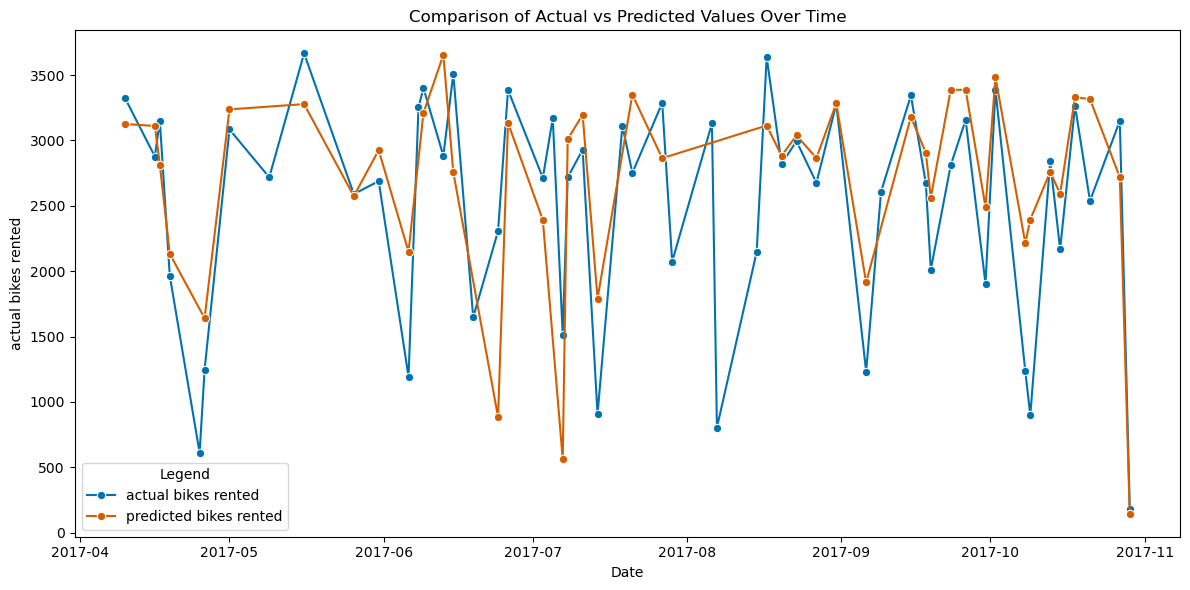

In [135]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=reg_df, x="Date", y="actual bikes rented", label="actual bikes rented", color="#0072B2", marker="o")
sns.lineplot(data=reg_df, x="Date", y="predicted bikes rented", label="predicted bikes rented", color="#D55E00", marker="o")

# Customize the plot
plt.title("Comparison of Actual vs Predicted Values Over Time")
plt.legend(title="Legend")
plt.tight_layout()

# Show the plot
plt.show()

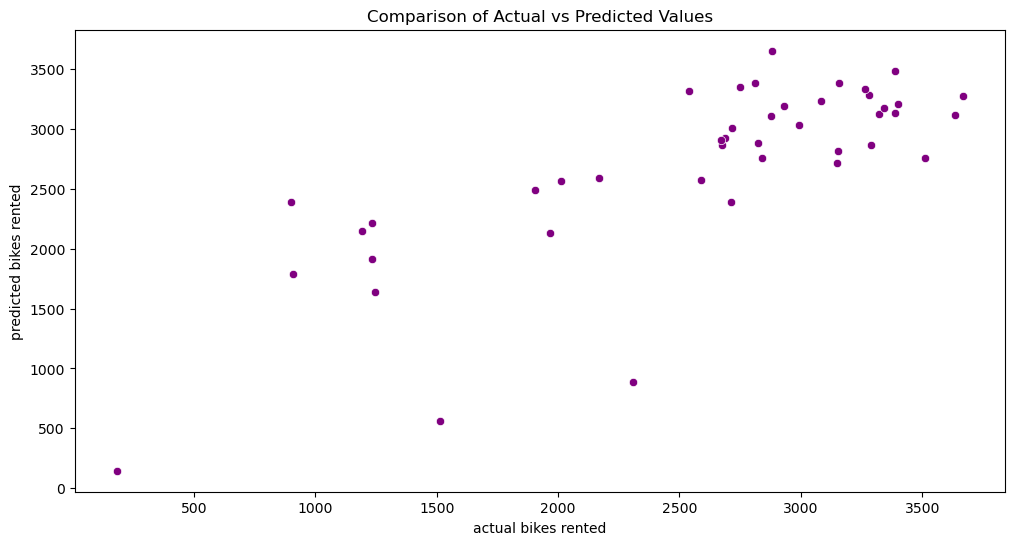

In [136]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=reg_df, x="actual bikes rented", y="predicted bikes rented", color="purple")
plt.title("Comparison of Actual vs Predicted Values")
plt.show();

## GLM

In [137]:
y = df.pop("BB_COUNT")
X = df

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42) 

In [139]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [140]:
# formula
formula = """BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"""
family = sm.families.Poisson()
model = smf.glm(formula, train, family=family)
result = model.fit()

In [141]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  160
Model:                            GLM   Df Residuals:                      153
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11014.
Date:                Tue, 03 Dec 2024   Deviance:                       20481.
Time:                        17:50:25   Pearson chi2:                 2.06e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1008      0.013    565.029      

In [123]:
print(result.aic)

23386.428474853165


In [142]:
residual_deviance = result.deviance
null_deviance = result.null_deviance
deviance_explained = 1 - (residual_deviance / null_deviance)
print(deviance_explained)

0.5869548662430194


In [124]:
y_predict = result.predict(X_test)

In [125]:
test_predict = pd.concat([y_test, y_predict], axis=1)
test_predict = test_predict.reset_index(drop=False)
test_predict = test_predict.rename(columns={"BB_COUNT": "actual bikes rented", 0: "predicted bikes rented"})

In [70]:
test_predict

,Date,actual bikes rented,predicted bikes rented
0,2017-04-10,3324,3100.935092
1,2017-10-15,2169,2618.918878
2,2017-06-06,1193,2161.036508
3,2017-10-09,898,2397.909268
4,2017-07-27,3287,2884.451667
5,2017-07-21,2751,3358.890036
6,2017-04-16,2877,3086.240028
7,2017-06-26,3386,3145.632165
8,2017-06-15,3510,2770.452713
9,2017-08-23,2994,3059.922167


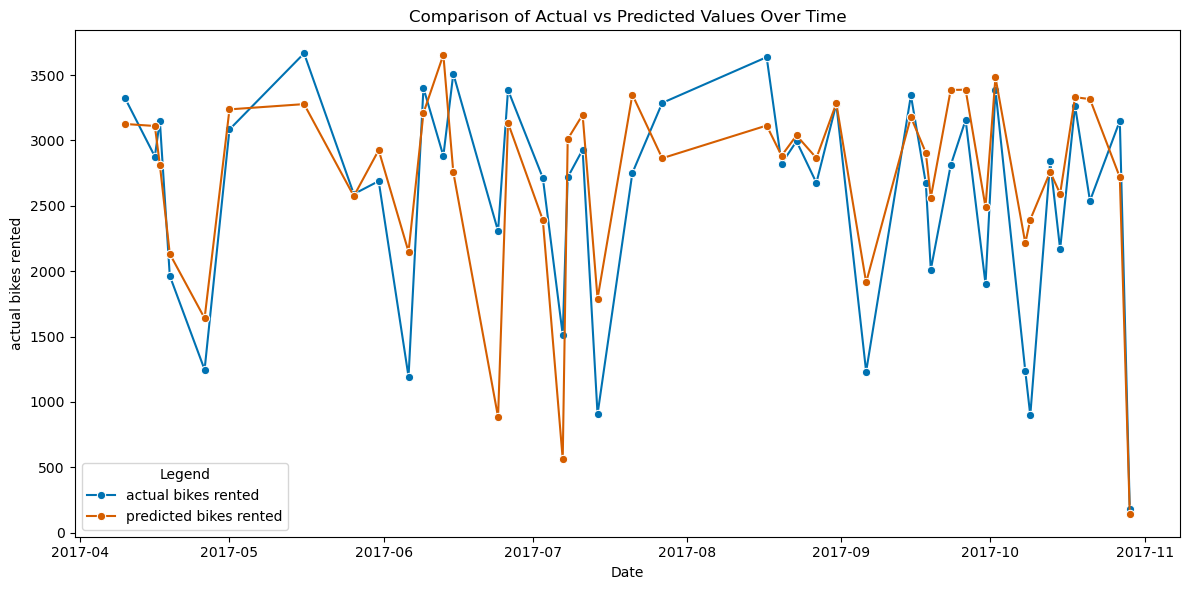

In [126]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_predict, x="Date", y="actual bikes rented", label="actual bikes rented", color="#0072B2", marker="o")
sns.lineplot(data=test_predict, x="Date", y="predicted bikes rented", label="predicted bikes rented", color="#D55E00", marker="o")

# Customize the plot
plt.title("Comparison of Actual vs Predicted Values Over Time")
plt.legend(title="Legend")
plt.tight_layout()

# Show the plot
plt.show()

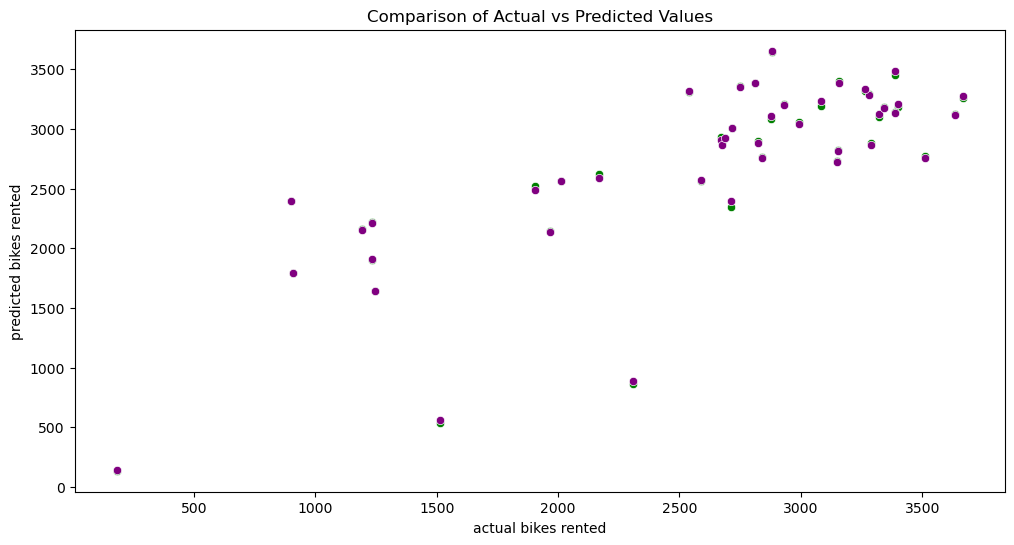

In [127]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=reg_df, x="actual bikes rented", y="predicted bikes rented", color="green")
sns.scatterplot(data=test_predict, x="actual bikes rented", y="predicted bikes rented", color="purple")
plt.title("Comparison of Actual vs Predicted Values")
plt.show();